## Testing Julia for GAIA

using the julia language for GAIA analaysis <br>

1. Testing the optimization of the dbscan


In [1]:
using PyCall
using DataFrames
using Stats

using Clustering 
using Statistics

push!(LOAD_PATH,"/home/stephane/Science/cluster/GAIA/master/src")
using gaiaClustering

import PyPlot; const plt = PyPlot

@pyimport astropy.io.votable as votable
# @pyimport matplotlib.pyplot as plt

## directory
rootdir = "/home/stephane/Science/cluster/GAIA"
wdir    = "/home/stephane/Science/cluster/GAIA/products"

cd(wdir)

In [2]:
## Main program

voname = "test.vot"

data       = read_votable(voname)
df         = filter_data(data)
dfcart     = add_cartesian(df)
blck       = [[1,2,3],[4,5], [6,7,8]]
wghtblck   = [5.0,3.0,1.0]
norm       = "identity"

dfcartnorm , scale8 = normalization_PerBlock(dfcart, blck, wghtblck , norm, false) 

## Votable test.vot read
## Filtering done ...
## Stars selected: 229238
## Cartesian transformation done ...
(8, 229238)
## Normalization identity done...
### [1pc,1pc,1pc,1km/s,1km/s,1mag,1mag] equivalent to [0.51031, 0.51031, 0.51031, 0.306186, 0.306186, 0.102062, 0.102062, 0.102062]


(gaiaClustering.Df(229238, [310.317 355.193 … 595.521 234.806; -13.4957 -17.0416 … 21.367 6.46134; … ; 0.105083 0.0830136 … 0.0591836 0.116791; 0.0898574 0.0740118 … 0.0431507 0.134191], [134.397 134.14 … 138.942 138.463; -29.6434 -29.3955 … -16.5988 -16.8769; … ; 16.3858 15.3948 … 15.4965 17.4475; 18.2958 16.9333 … 16.4991 19.9067], [0.185544 0.0697266 … 0.0843997 0.323194; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]), [0.51031, 0.51031, 0.51031, 0.306186, 0.306186, 0.102062, 0.102062, 0.102062])

## Starting DBSCAN ...
ϵ : 3.5


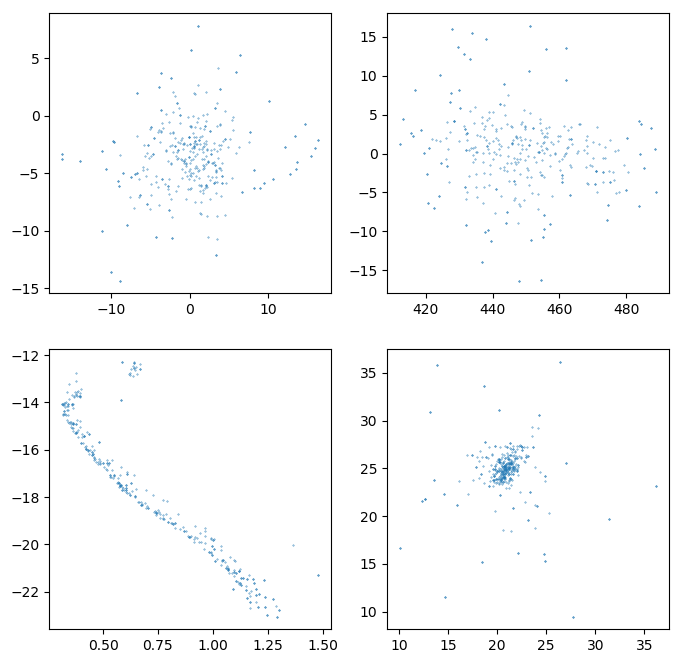

i : 1
299
Mean: 448.9612474635205
i : 2
37
Mean: 207.09048818637783
Number of dbscan cluster 2


In [9]:
## Clustering ..
println("## Starting DBSCAN ...")

eps = 3.5

println("ϵ : $eps")

dftemp = copy1(dfcartnorm)

res = dbscan(dftemp.data , eps , leafsize=20, min_neighbors=10, min_cluster_size=30)

i = 1
for cl in res
    println("i : $i")
    i += 1
    indx = cl.core_indices
    append!(indx, cl.boundary_indices) 
    println(length(indx))
    mean1 = mean(dfcart.data[1,indx])
    println("Mean: $mean1")
#    println(length(cl.core_indices))
#    println(length(cl.boundary_indices))

end
sdb = length(res)
println("Number of dbscan cluster $sdb")


indx = res[1].core_indices
append!(indx, res[1].boundary_indices)


plt.figure(figsize=(8.0,8.0))

plt.subplot(2, 2, 1)
x = dfcart.data[2,indx]
y = dfcart.data[3,indx]
plt.scatter(x, y , s = 0.1 )

plt.subplot(2, 2, 2)
x = dfcart.data[1,indx]
y = dfcart.data[2,indx]
plt.scatter(x, y , s = 0.1 )

plt.subplot(2, 2, 3)
x = dfcart.data[7,indx]
y = -dfcart.data[6,indx]
plt.scatter(x, y , s = 0.1 )

plt.subplot(2, 2, 4)
x = dfcart.data[4,indx]
y = -dfcart.data[5,indx]
plt.scatter(x, y , s = 0.1 )


plt.show()
#plt.close()